In [6]:
import sys
import numpy as np
from collections import Counter
sys.path.append('../scales_project/')
from utils import simulate_EPR
from importlib import reload
reload(simulate_EPR)


<module 'utils.simulate_EPR' from '/home/lauale/research/rebuttal_scales/notebooks/utils/simulate_EPR.py'>

In [7]:
simul

NameError: name 'simul' is not defined

In [8]:
import matplotlib as mpl
def setup_mpl():
    mpl.rc('font', size=20)
    mpl.rcParams['legend.fontsize'] = 'small'
    mpl.rcParams['legend.fontsize'] = 'small'
    mpl.rcParams['xtick.labelsize'] = 'small'
    mpl.rcParams['ytick.labelsize'] = 'small'
    mpl.rcParams['font.family']='Helvetica 45 Light'
    mpl.rcParams['xtick.major.pad']='12'
    mpl.rcParams['ytick.major.pad']='12'
    mpl.rcParams['lines.linewidth'] = 2
    mpl.rcParams['xtick.major.width'] = 2
    mpl.rcParams['ytick.major.width'] = 2
    mpl.rcParams['xtick.minor.width'] = 2
    mpl.rcParams['ytick.minor.width'] = 2
    mpl.rcParams['xtick.major.size'] = 6
    mpl.rcParams['ytick.major.size'] = 6
    mpl.rcParams['xtick.minor.size'] = 3
    mpl.rcParams['ytick.minor.size'] = 3
    mpl.rcParams['axes.linewidth'] = 2
    mpl.rcParams['ytick.direction'] = 'in'
    mpl.rcParams['xtick.direction'] = 'in'
    mpl.rcParams['xtick.top']=True
    mpl.rcParams['ytick.right']=True
    mpl.rcParams['mathtext.default']='regular'
    mpl.rcParams['xtick.major.pad']='4'
    mpl.rcParams['ytick.major.pad']='4'
    mpl.rcParams['axes.labelpad']= 2
    
    alpha = 0.6
    to_rgba = mpl.colors.ColorConverter().to_rgba
setup_mpl()

In [9]:

reload(simulate_EPR)

<module 'utils.simulate_EPR' from '/home/lauale/research/rebuttal_scales/notebooks/utils/simulate_EPR.py'>

In [16]:
all_records = []
model = simulate_EPR.EPRModel(p_beta=0.55)
model.reset()
model.run_simulation(1000)
all_records.append(model.records)
model.records_1 = model.records


In [17]:
locs = [model.get_coordinates()[i] for i in np.array(model.records)[:,0]]
distances = np.linalg.norm(np.array(locs[1:]) - np.array(locs[:-1]),axis = 1)

<ipython-input-17-a1d7001dd3f7>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  locs = [model.get_coordinates()[i] for i in np.array(model.records)[:,0]]


Populating the interactive namespace from numpy and matplotlib


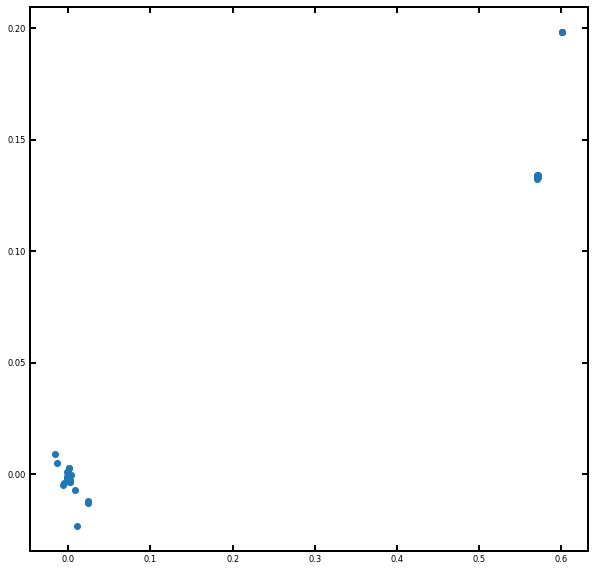

In [18]:
%pylab inline
plt.figure(figsize = (10,10))
plt.scatter(np.array(list(model.d.values()))[:,0],np.array(list(model.d.values()))[:,1])

<ipython-input-19-408b9113debf>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  locs = np.array(model.records_1)[:,0]


Searching for minimum at scale 2:


Found minimum at   d: 150.4 m
                   L: 4323.0


Result of statistical test:


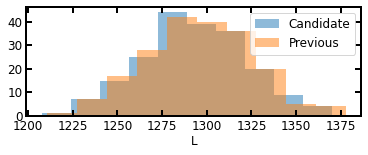

    p = 0.17793352788293415
    --x Cannot reject null hypothesis.

Could not improve beyond scale 1. Optimization ends.


In [19]:
sys.path.append('../scales_project/utils/')
from utils import scale_by_scale_optim
from utils import utils

locs = np.array(model.records_1)[:,0]

stop_coords = [model.d[i] for i in locs]
my_split = scale_by_scale_optim.ScalesOptim(np.array(locs), 
                                            np.array(stop_coords),
                                            distance_func=utils.haversine,
                                            min_dist = 1.2,
                                            nprocs = 1,
                                            verbose=True, 
                                            bootstrap = True, 
                                            information_criterion = None,
                                            siglvl= 0.05)  
final_series, final_scales, likelihoods, criterion_s, final_sizes, final_proba_dist, alphas = my_split.find_best_scale()


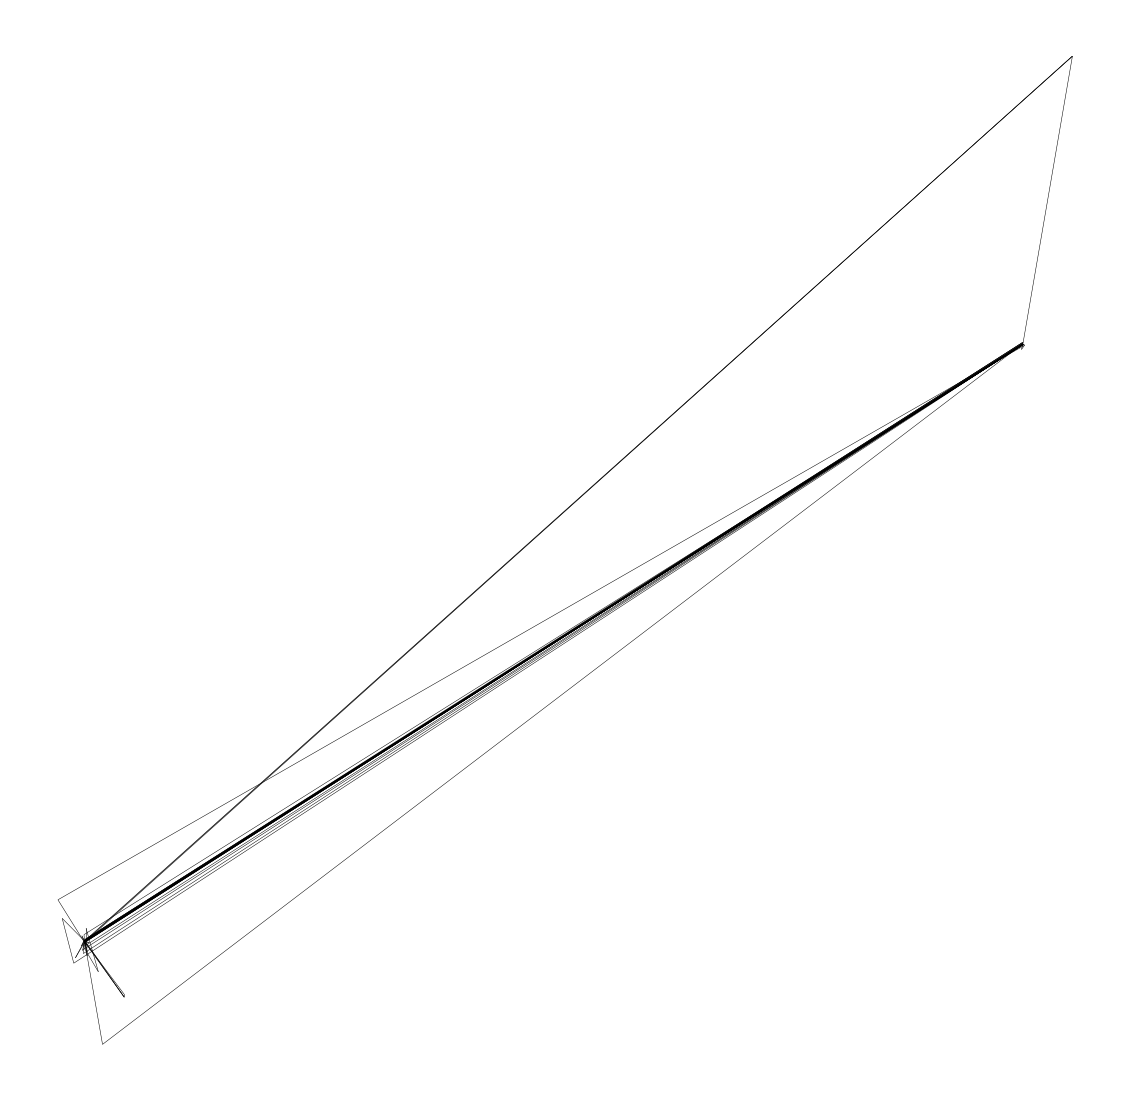

In [20]:
from matplotlib.collections import LineCollection
fig,ax = plt.subplots(figsize = (20,20))
x,y = np.array(list(model.d.values()))[:,0],np.array(list(model.d.values()))[:,1]
xy = np.array(list(model.d.values()))
segments = list(zip(xy[:-1],xy[1:]))
coll = LineCollection(segments, lw = 0.5, color = 'k')
ax.add_collection(coll)
ax.autoscale()
#ax.scatter(x,y, s = 1, color = 'k',zorder = 100)
ax.axis('off')
plt.show()

In [21]:
model.beta

0.55

Text(0.5, 0, 'distance (m)')

findfont: Font family ['Helvetica 45 Light'] not found. Falling back to DejaVu Sans.


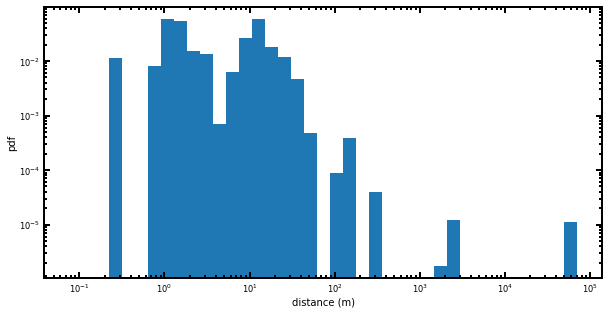

In [22]:
plt.figure(figsize = (10,5))
utils.plot_scales_histogram(np.array(final_series).astype(int), 
                            np.array(stop_coords), 
                            log_dist=False, 
                            density=True,
                            distance_func=utils.haversine)
plt.ylabel('pdf')
plt.xlabel('distance (m)')
